## 구내식당 인원 예측데이터
### 식당 인원에 영향을 주는 데이터는?
#### 1. 년도별 이벤트 (코로나), 요일
코로나 이전과 이후의 구내식당 이용 인원이 다르지 않을까?

#### 2. 계절? (여름휴가)
코로나의 유무를 떠나서 원래 가지고 있던 구내식당 이용 인원 패턴이 있지 않을까?

#### 3. 사람 인원 수
휴가자, 출장자, 재택근무, 외근자 수에 따라 달라지지 않을까?

#### 4. 메뉴
구내식당 메뉴에 따라 다르지 않을까?

#### 5. 모르겠닿ㅎㅎ

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='New Gulim')

In [55]:
train = pd.read_csv('C:/Users/juyeo/Desktop/구내식당/train.csv',encoding='utf-8')
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


                   본사정원수    본사휴가자수    본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
본사정원수           1.000000  0.244666 -0.061688        0.146544     0.452293   
본사휴가자수          0.244666  1.000000 -0.273318       -0.230789     0.065397   
본사출장자수         -0.061688 -0.273318  1.000000       -0.308757    -0.352643   
본사시간외근무명령서승인건수  0.146544 -0.230789 -0.308757        1.000000     0.156792   
현본사소속재택근무자수     0.452293  0.065397 -0.352643        0.156792     1.000000   
중식계            -0.115529 -0.391975 -0.512680        0.535611     0.076509   
석식계            -0.173852 -0.316894 -0.188164        0.571168    -0.057534   

                     중식계       석식계  
본사정원수          -0.115529 -0.173852  
본사휴가자수         -0.391975 -0.316894  
본사출장자수         -0.512680 -0.188164  
본사시간외근무명령서승인건수  0.535611  0.571168  
현본사소속재택근무자수     0.076509 -0.057534  
중식계             1.000000  0.508287  
석식계             0.508287  1.000000  


<AxesSubplot:>

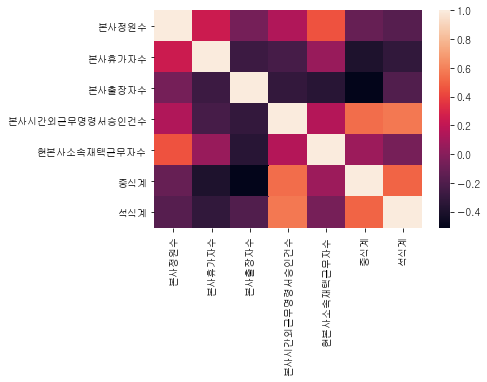

In [56]:
corr=train.corr()
print(corr)
sns.heatmap(corr)

In [57]:
#결측값 없음
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [58]:
#기초통계량
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


#### 1. 년도별 이벤트 (코로나), 요일
코로나 이전과 이후의 구내식당 이용 인원이 다르지 않을까?
일단 년도별로 나눠서 데이터 보기

In [59]:
train['일자'] = train['일자'].astype('str')
train['요일'] = train['요일'].map({'월':0, '화':1, '수':2, '목':3, '금':4})
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,3,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,4,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,0,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [60]:
#날짜 분리
train['년도'] = train['일자'].str[ : 4]
train['월'] =  train['일자'].str[ 5: 7]
train['일'] =  train['일자'].str[-2 : ]
train['년월'] = train['일자'].str[:7]
train

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년도,월,일,년월
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,02,01,2016-02
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,02,02,2016-02
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,02,03,2016-02
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,02,04,2016-02
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,02,05,2016-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2021,01,20,2021-01
1201,2021-01-21,3,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2021,01,21,2021-01
1202,2021-01-22,4,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2021,01,22,2021-01
1203,2021-01-25,0,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2021,01,25,2021-01


In [61]:
train.groupby(['년도']).mean()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
년도,,,,,,,,
2016,2.017621,2660.057269,131.986784,234.321586,229.013216,0.000000,932.792952,519.418502
2017,2.028689,2662.639344,139.176230,246.233607,236.782787,0.000000,897.614754,457.049180
2018,1.991632,2764.669456,156.744770,254.029289,239.732218,0.000000,882.903766,463.539749
2019,1.991870,2962.731707,177.195122,255.479675,307.626016,0.000000,850.512195,445.386179
2020,2.000000,2972.422414,186.943966,218.366379,353.995690,198.836207,882.267241,430.668103
2021,1.823529,2983.000000,114.294118,181.352941,320.647059,370.294118,1009.705882,396.588235


C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\juyeo\anaconda3\lib\site-packages\seaborn\distr

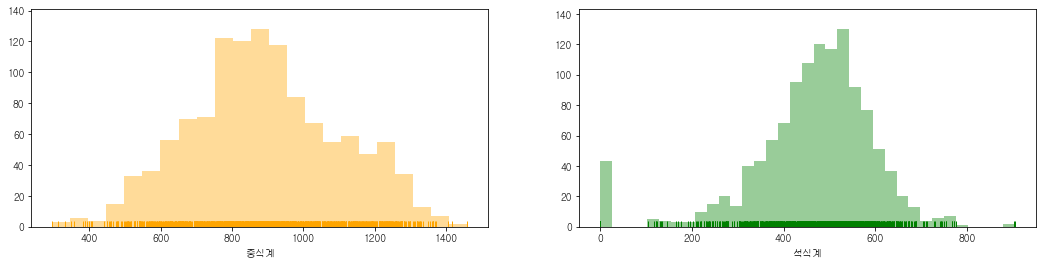

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train["중식계"], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(train["석식계"], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

# 점심은 700~1000에 몰려있다
# 저녁에 0 데이터가 있다


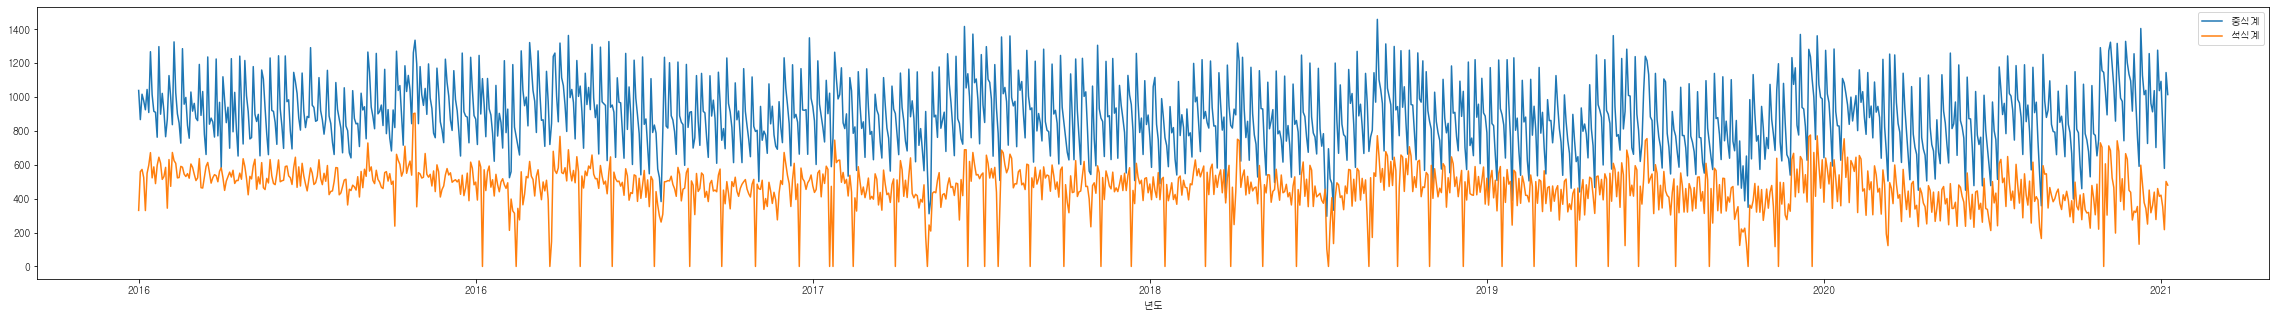

In [63]:
train.plot(x = '년도', y = ['중식계','석식계'], figsize = (40, 5))
plt.show()

# 코로나 전후의 차이는 별로 없는 듯
# 2016 후반부터 갑자기 낮아지는 구간이 생김 (석식계)
# 

<AxesSubplot:>

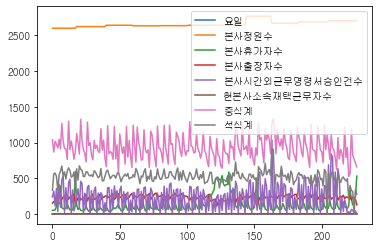

In [64]:
year16 = train['년도'] == '2016'
year16 = train[year16]
year16.plot()


In [65]:
yearmonth = train.groupby(['년월']).mean()
yearmonth

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
년월,,,,,,,,
2016-02,2.055556,2601.0,153.611111,210.111111,247.611111,0.000000,967.888889,531.388889
2016-03,2.045455,2624.0,63.863636,229.363636,221.500000,0.000000,962.227273,556.181818
2016-04,2.100000,2643.0,78.150000,247.300000,207.500000,0.000000,893.750000,533.250000
2016-05,1.700000,2635.0,89.700000,250.900000,209.200000,0.000000,943.400000,534.700000
2016-06,2.142857,2637.0,91.095238,251.523810,199.285714,0.000000,932.761905,534.666667
2016-07,2.095238,2643.0,166.523810,224.476190,189.428571,0.000000,904.095238,511.809524
2016-08,1.954545,2644.0,314.772727,201.227273,196.636364,0.000000,912.409091,510.090909
2016-09,2.000000,2769.0,138.315789,232.842105,269.578947,0.000000,950.578947,543.157895
2016-10,2.000000,2670.0,100.700000,252.250000,276.900000,0.000000,1010.800000,555.450000


<AxesSubplot:xlabel='년월'>

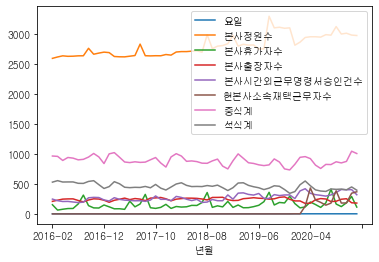

In [66]:
train.groupby(['년월']).mean().plot()
#본사 정원수가 차츰 증가하는 추세

In [67]:
#본사 정원수 기준으로 비율로 따져야할 듯?
prop = pd.DataFrame()
prop['일자'] = train['일자']
prop['요일'] = train['요일']
prop['본사휴가자수'] = train['본사휴가자수']/train['본사정원수']
prop['본사출장자수'] = train['본사출장자수']/train['본사정원수']
prop['본사시간외근무명령서승인건수'] = train['본사시간외근무명령서승인건수']/train['본사정원수']
prop['현본사소속재택근무자수'] = train['현본사소속재택근무자수']/train['본사정원수']
prop['중식계'] = train['중식계']/train['본사정원수']
prop['석식계'] = train['석식계']/train['본사정원수']
prop['년월'] = train['년월']
prop['월'] = train['월']
prop['일'] = train['일']

prop

,일자,요일,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,년월,월,일
0,2016-02-01,0,0.019223,0.057670,0.091503,0.000000,0.399462,0.127259,2016-02,02,01
1,2016-02-02,1,0.019223,0.066513,0.122645,0.000000,0.333333,0.215302,2016-02,02,02
2,2016-02-03,2,0.021530,0.069204,0.042676,0.000000,0.391003,0.220300,2016-02,02,03
3,2016-02-04,3,0.039985,0.084583,0.136486,0.000000,0.376009,0.201845,2016-02,02,04
4,2016-02-05,4,0.106882,0.069589,0.013072,0.000000,0.355632,0.126874,2016-02,02,05
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2,0.025142,0.066376,0.001341,0.131076,0.366410,0.141133,2021-01,01,20
1201,2021-01-21,3,0.030841,0.077439,0.154878,0.117667,0.278914,0.118337,2021-01,01,21
1202,2021-01-22,4,0.085484,0.083138,0.000335,0.101576,0.194100,0.072746,2021-01,01,22
1203,2021-01-25,0,0.035870,0.051291,0.206504,0.109621,0.383842,0.168287,2021-01,01,25


In [68]:
prop_y

,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
요일,,,,,,
0,0.061681,0.072987,0.171116,0.015182,0.408860,0.192603
1,0.041962,0.082491,0.162099,0.015566,0.331386,0.186319
2,0.039850,0.086403,0.002907,0.015199,0.324237,0.130659
3,0.048515,0.091415,0.134532,0.014110,0.295221,0.172111
4,0.086499,0.097863,0.014366,0.012412,0.234339,0.145816


Text(0.5, 1.0, '중식계 추이')

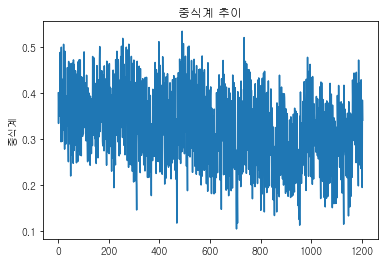

In [69]:
sns.lineplot(data = prop['중식계'])
plt.title('중식계 추이')

Text(0.5, 1.0, '석식계 추이')

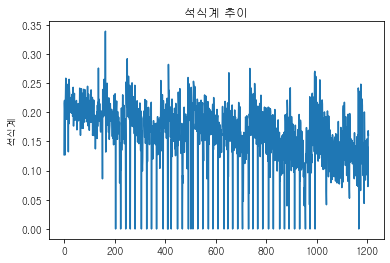

In [70]:
sns.lineplot(data = prop['석식계'])
plt.title('석식계 추이')

No handles with labels found to put in legend.


Text(0.5, 1.0, '요일 별 중식계 평균')

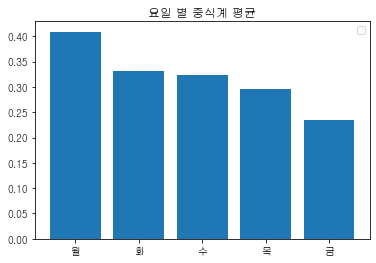

In [71]:
prop_y = prop.groupby(['요일']).mean()

x = ['월','화','수','목','금']
prop_y
plt.bar(x,prop_y['중식계'])
plt.legend()
plt.title('요일 별 중식계 평균')

No handles with labels found to put in legend.


Text(0.5, 1.0, '요일 별 석식계 평균')

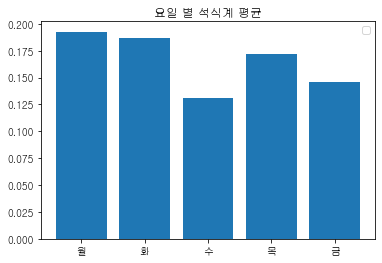

In [72]:
plt.bar(x,prop_y['석식계'])
plt.legend()
plt.title('요일 별 석식계 평균')

In [73]:
prop.groupby(['요일']).describe()

본사휴가자수                                                              \
    count      mean       std       min       25%       50%       75%   
요일                                                                      
0   241.0  0.061681  0.060863  0.018617  0.034026  0.040469  0.055258   
1   240.0  0.041962  0.042231  0.011729  0.022238  0.026761  0.040063   
2   239.0  0.039850  0.034945  0.008475  0.021924  0.026966  0.038145   
3   244.0  0.048515  0.047881  0.013720  0.025307  0.031620  0.046140   
4   241.0  0.086499  0.046529  0.023819  0.060427  0.072218  0.089681   

             본사출장자수            ...       중식계              석식계            \
         max  count      mean  ...       75%       max  count      mean   
요일                             ...                                        
0   0.381237  241.0  0.072987  ...  0.450147  0.533710  241.0  0.192603   
1   0.353811  240.0  0.082491  ...  0.366053  0.478261  240.0  0.186319   
2   0.183434  239.0  0.086403  ...  0.355589  0.500375  239.0  0.130659   
3   0.464164  244.0  0.091415  ...  0.328085  0.447940  244.0  0.172111   
4   0.322698  241.0  0.097863  ...  0.264316  0.389298  241.0  0.145816   

                                                                
         std       min       25%       50%       75%       max  
요일                                                              
0   0.041322  0.036543  0.171189  0.196679  0.219909  0.291793  
1   0.039413  0.000000  0.163741  0.193999  0.211824  0.337828  
2   0.068202  0.000000  0.112487  0.146230  0.177108  0.338951  
3   0.033740  0.041475  0.154542  0.174162  0.193533  0.264884  
4   0.042111  0.000000  0.118911  0.145996  0.175153  0.256479  

[5 rows x 48 columns]

In [74]:
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp) 

In [75]:
lunch

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치'],
 ['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '대구찌개', '마늘간장치킨', '새송이버섯볶음', '돌나물무침/치킨무', '요구르트', '포기김치'],
 ['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', '파래김*양념장', '부럼/요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '콩나물국', '돈육간장볶음', '버섯잡채', '꽃상추무침', '요구르트', '포기김치'],
 ['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '북어계란국', '닭갈비

In [36]:
bob = []; gook = []; banchan = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan_tmp = day_menu[2:]; banchan.append(banchan_tmp)


In [37]:
bob

['쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '카레덮밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '낙지비빔밥',
 '쌀밥/잡곡밥',
 '쌀밥/오곡밥',
 '쌀밥/잡곡밥',
 '비빔밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '곤드레밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '콩나물밥*달래장',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '봄새싹비빔밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '콩나물밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '나물비빔밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '곤드레밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '단호박영양밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '산채비빔밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '낙지볶음밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '열무비빔밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '카레덮밥',
 '쌀밥/잡곡밥',
 '쌀밥/잡곡밥',
 '쌀밥

In [38]:
banchan

[['쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치'],
 ['고구마치즈구이', '해초무침', '요구르트', '요구르트', '포기김치'],
 ['마늘간장치킨', '새송이버섯볶음', '돌나물무침/치킨무', '요구르트', '포기김치'],
 ['갈치구이', '호박꼬지&고사리&무나물', '파래김*양념장', '부럼/요구르트', '포기김치'],
 ['돈육간장볶음', '버섯잡채', '꽃상추무침', '요구르트', '포기김치'],
 ['소세지피망볶음', '맛탕', '귤', '요구르트', '포기김치'],
 ['닭갈비', '새싹두부구이', '곰피초장', '요구르트', '포기김치'],
 ['오징어볶음', '계란찜', '도라지초무침', '요구르트', '포기김치'],
 ['제육볶음', '늙은호박전', '치커리생채', '요구르트', '포기김치'],
 ['주꾸미볶음', '맛살계란말이', '아삭고추무침', '포기김치'],
 ['탕수육', '새송이버섯조림', '무생채', '요구르트', '포기김치'],
 ['가자미튀김', '메추리알조림', '열무된장나물', '깍두기'],
 ['닭갈비', '모둠묵*양념장', '톳두부무침', '포기김치']

In [39]:
gook

['오징어찌개',
 '김치찌개',
 '팽이장국',
 '쇠고기무국',
 '떡국',
 '시래기국',
 '꽃게탕',
 '시금치국',
 '쇠고기무국',
 '냉이된장국',
 '유부장국',
 '대구찌개',
 '쇠고기느타리국',
 '콩나물국',
 '팽이장국',
 '북어계란국',
 '수제비국',
 '얼갈이된장국',
 '쇠고기미역국',
 '근대된장국',
 '부대찌개',
 '콩나물국',
 '차돌박이찌개',
 '북어국',
 '고추장찌개',
 '배추된장국',
 '어묵국',
 '쑥국',
 '콩나물김치국',
 '사골우거지국',
 '시금치국',
 '꽃게탕',
 '쇠고기샤브국',
 '맑은국',
 '북어계란국',
 '닭개장',
 '얼갈이된장국',
 '옹심이만두국',
 '쪽파국',
 '매운콩나물국',
 '버섯들깨탕',
 '순두부찌개',
 '북어국',
 '올갱이아욱국',
 '어묵국',
 '배추된장국',
 '시래기국',
 '부대찌개',
 '수제비국',
 '냉이된장찌개',
 '배추된장국',
 '육개장',
 '근대된장국',
 '대구매운탕',
 '북어국',
 '콩나물국',
 '쇠고기무국',
 '미소장국',
 '미역국',
 '돈육김치찌개',
 '시금치국',
 '무채국',
 '쇠고기샤브국',
 '매운어묵국',
 '콩나물국',
 '시래기된장국',
 '오징어국',
 '된장찌개',
 '감자고추장찌개',
 '들깨버섯탕',
 '미소장국',
 '열무된장국',
 '순두부찌개',
 '북어콩나물국',
 '한방갈비탕',
 '미역장국',
 '쇠고기해장국',
 '배추된장국',
 '콩나물김치국',
 '근대된장국',
 '강된장찌개',
 '오이미역냉국',
 '차돌박이찌개',
 '북어계란국',
 '참치김치찌개',
 '매운콩나물국',
 '된장찌개',
 '북어콩나물국',
 '배추된장국',
 '맑은국',
 '부대찌개',
 '꽃게탕',
 '어묵국',
 '대구찌개',
 '시래기국',
 '쇠고기무국',
 '도토리묵냉국',
 '배추된장국',
 '육개장',
 '콩나물국',
 '버섯들깨찌개',
 '수제비국',
 '감자고추장찌개',
 '쇠고기미역국'

In [40]:
lunch_df = pd.DataFrame()
lunch_df['bob'] = bob
lunch_df['gook'] = gook
lunch_df['banchan'] = banchan
lunch_df

,bob,gook,banchan
0,쌀밥/잡곡밥,오징어찌개,"[쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]"
1,쌀밥/잡곡밥,김치찌개,"[가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]"
2,카레덮밥,팽이장국,"[치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]"
3,쌀밥/잡곡밥,쇠고기무국,"[주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]"
4,쌀밥/잡곡밥,떡국,"[돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]"
...,...,...,...
1200,쌀밥/흑미밥/찰현미밥,아욱국,"[수제함박스테이크, 견과류마카로니범벅, 생깻잎지, 단호박물김치, 양상추샐러드*오리엔탈D]"
1201,쌀밥/수수밥/찰현미밥,냉이된장국,"[동파육, 봄동전, 청경채/버섯숙회*초장, 무생채, 양상추샐러드*파인D]"
1202,전주비빔밥*약고추장,계란파국,"[요거닭, 올방개묵무침, 파프리카해초무침, 포기김치, 양상추샐러드*자몽D]"
1203,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,"[돈육간장불고기, 깐풍연근, 연두부*달래양념장, 봄동겉절이/양념김, 양상추샐러드*오..."


#### 밥 EDA
전체로 보니 너무 많다

In [41]:
bob_l = pd.DataFrame()
bob_l['count'] = lunch_df['bob'].value_counts()
bob_l=bob_l.reset_index()
bob_l


,index,count
0,쌀밥/잡곡밥,879
1,쌀밥/흑미밥/찰현미밥,74
2,콩나물밥,23
3,카레덮밥,18
4,나물비빔밥,15
...,...,...
70,계란채소볶음밥,1
71,쌀밥/완두콩밥/찰현미밥,1
72,김치필라프,1
73,닭살카레라이스,1


([<matplotlib.patches.Wedge at 0x1eb640732e0>,
 [Text(-0.7260437689032183, 0.8263537049210892, ''),
  Text(0.0702145191166646, -1.097756767824829, ''),
  Text(0.3426451258443376, -1.045272365336001, ''),
  Text(0.4522084456609172, -1.0027499796424517, ''),
  Text(0.5367013582263097, -0.9601831346561105, ''),
  Text(0.6029061192215186, -0.9200566348900746, ''),
  Text(0.6546573159450646, -0.8839817863958533, ''),
  Text(0.699839801088581, -0.8486602693730252, ''),
  Text(0.7388809395016271, -0.8148956726116496, ''),
  Text(0.7722209591715743, -0.7833739785160941, ''),
  Text(0.8042174585352093, -0.750489359942677, ''),
  Text(0.8348147696569302, -0.7162990299886263, ''),
  Text(0.863959658927466, -0.6808624734452154, ''),
  Text(0.8882300715281951, -0.6488816071002611, ''),
  Text(0.9080927331009462, -0.6207798225532576, ''),
  Text(0.9270666378469791, -0.5920704763717731, ''),
  Text(0.9436627600900136, -0.5652438369582614, ''),
  Text(0.9580770459806901, -0.5404520089378102, ''),
  Te

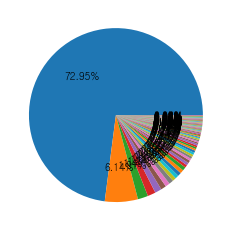

In [44]:
plt.pie(bob_l['count'],autopct='%.2f%%')

<AxesSubplot:ylabel='bob'>

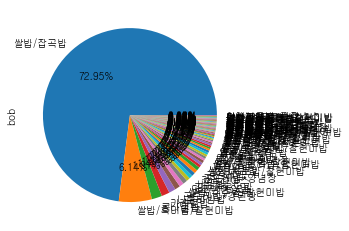

In [43]:
dfb=lunch_df['bob'].value_counts()
dfb.plot.pie(autopct='%.2f%%')


In [45]:
gook_l = pd.DataFrame()
gook_l['count'] = lunch_df['gook'].value_counts()
gook_l=gook_l.reset_index()
gook_l

,index,count
0,맑은국,46
1,콩나물국,44
2,된장찌개,37
3,어묵국,31
4,가쯔오장국,28
...,...,...
267,순대국밥,1
268,굴떡국,1
269,호박잎된장국,1
270,황태맑은국,1


([<matplotlib.patches.Wedge at 0x1eb642567c0>,
 [Text(1.0920989748060392, 0.1316048222049565, ''),
  Text(1.031575526199546, 0.38190566079351285, ''),
  Text(0.9286070085577185, 0.5896516121045421, ''),
  Text(0.8100625703982759, 0.7441764790960128, ''),
  Text(0.6864791924613363, 0.8595035301368062, ''),
  Text(0.5541341465304707, 0.9502291027162592, ''),
  Text(0.4099982522265816, 1.0207357313091123, ''),
  Text(0.2627116809339884, 1.0681678579234812, ''),
  Text(0.11878341293913404, 1.0935677851923635, ''),
  Text(-0.018640137192250324, 1.0998420546994256, ''),
  Text(-0.14725064667578316, 1.0900996500566194, ''),
  Text(-0.2682778781090206, 1.0667834738677393, ''),
  Text(-0.3832501042647929, 1.031076795190846, ''),
  Text(-0.49106716184917387, 0.9843033285290654, ''),
  Text(-0.59086165411429, 0.9278375427289658, ''),
  Text(-0.6842361045759344, 0.8612902839314693, ''),
  Text(-0.7681257321682664, 0.787389903148983, ''),
  Text(-0.8403916076830158, 0.7097478043192217, ''),
  Text(

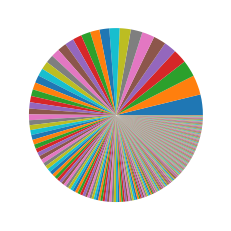

In [46]:
plt.pie(gook_l['count'])

#리스트라서 안됌 ㄷ
코드 공유에 올라온 거 그대로 해야할 듯
banchan_l = pd.DataFrame()
banchan_l['count'] = lunch_df['banchan'].value_counts()
banchan_l.reset_index()

### 저녁 EDA

In [76]:
dinner = []
for day in range(len(train)):
    tmp = train.iloc[day, 9].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    dinner.append(tmp) 

In [77]:
dinner

[['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치'],
 ['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치'],
 ['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치'],
 ['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치'],
 ['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치'],
 ['참치회덮밥', '맑은국', '군만두', '과일샐러드', '락교', '포기김치'],
 ['쌀밥/잡곡밥', '김치콩나물국', '미니함박', '어묵볶음', '물파래무침', '깍두기'],
 ['쌀밥/잡곡밥', '홍합미역국', '등갈비김치찜', '임연수구이', '브로컬리초장', '포기김치'],
 ['쌀밥/잡곡밥', '된장찌개', '쇠불고기', '해파리겨자채', '봄동무침', '포기김치'],
 ['볶음밥*자장소스', '맑은국', '새우또띠아', '쨔샤이무침', '요플레', '포기김치'],
 ['쌀밥/잡곡밥', '순두부찌개', '명태조림', '감자채볶음', '쌈만두', '포기김치'],
 ['쌀밥/잡곡밥', '설렁탕', '김치전', '야채스틱', '바나나', '석박지'],
 ['쌀밥/잡곡밥', '옹심이만두국', '떡갈비조림', '청포묵무침', '부추오이생채', '포기김치'],
 ['쌀밥/잡곡밥', '콩비지찌개', '해물까스&타르타르소스', '볶음쌀국수', '미역레몬초무침', '통배추겉절이'],
 ['쌀밥/잡곡밥', '열무된장국', '매운돼지갈비찜', '멸치호두볶음', '숙주나물', '포기김치'],
 ['김밥', '잔치국수', '교자만두', '찜)', '멕시칸샐러드', '무피클', '포기김치'],
 ['쌀밥/잡곡밥', '닭개장', '삼치구이', '꽃맛살볶음', '청경채사과무침', '포기김치'],
 ['쌀밥/잡곡밥', '버섯들깨탕', '꽁치한마리구이', '두부양념조림', '구이김'

In [103]:
bob = []; gook = []; banchan = []
for i, day_menu in enumerate(dinner):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan_tmp = day_menu[2:]; banchan.append(banchan_tmp)

IndexError: list index out of range

In [91]:
bob_d
gook_d
banchan_d

[['자반고등어구이', '두부조림', '건파래무침', '포기김치'],
 ['유산슬', '아삭고추무침', '바나나', '포기김치'],
 ['황태양념구이', '고기전', '새송이버섯볶음', '포기김치'],
 ['멕시칸샐러드', '군고구마', '무피클', '포기김치'],
 ['닭갈비', '감자소세지볶음', '콩나물무침', '포기김치'],
 ['군만두', '과일샐러드', '락교', '포기김치'],
 ['미니함박', '어묵볶음', '물파래무침', '깍두기'],
 ['등갈비김치찜', '임연수구이', '브로컬리초장', '포기김치'],
 ['쇠불고기', '해파리겨자채', '봄동무침', '포기김치'],
 ['새우또띠아', '쨔샤이무침', '요플레', '포기김치'],
 ['명태조림', '감자채볶음', '쌈만두', '포기김치'],
 ['김치전', '야채스틱', '바나나', '석박지'],
 ['떡갈비조림', '청포묵무침', '부추오이생채', '포기김치'],
 ['해물까스&타르타르소스', '볶음쌀국수', '미역레몬초무침', '통배추겉절이'],
 ['매운돼지갈비찜', '멸치호두볶음', '숙주나물', '포기김치'],
 ['교자만두', '찜)', '멕시칸샐러드', '무피클', '포기김치'],
 ['삼치구이', '꽃맛살볶음', '청경채사과무침', '포기김치'],
 ['꽁치한마리구이', '두부양념조림', '구이김', '포기김치'],
 ['버섯불고기', '콩나물겨자채', '양념깻잎지', '포기김치'],
 ['떡볶이', '군고구마', '단무지', '포기김치'],
 ['미트볼조림', '옥수수전', '부추생채', '포기김치'],
 ['돈육굴소스볶음', '감자채볶음', '물파래무침', '포기김치'],
 ['수제고로케*케찹', '과일샐러드', '오복지', '포기김치'],
 ['생선까스*탈탈소스', '야채계란찜', '콩나물무침', '포기김치'],
 ['개성감자만두', '타코야끼', '꼬들단무지', '포기김치'],
 ['코다리무조림', '고추잡채*꽃빵', '봄동겉절이', '포기김치'],
 ['간장찜닭', 

In [92]:
dinner_df = pd.DataFrame()
dinner_df['bob'] = bob_d
dinner_df['gook'] = gook_d
dinner_df['banchan'] = banchan_d
dinner_df

ValueError: Length of values (204) does not match length of index (205)

In [99]:
dinner_df

,bob
0,쌀밥/잡곡밥
1,콩나물밥*양념장
2,쌀밥/잡곡밥
3,미니김밥*겨자장
4,쌀밥/잡곡밥
...,...
200,멸치주먹밥
201,쌀밥/잡곡밥
202,쌀밥/잡곡밥
203,참치주먹밥
